## origin, flip, rorate, rorate_flip

In [1]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import ndimage

In [10]:
#############################

In [20]:
# Delete image don't have pose human
path = "/home/neosai/Documents/dataset/preprocess/"
path_image = path + "Images/004/"
path_label = path + "Labels/004/"

for file in os.listdir(path_label):
    with open(path_label + file) as file_text_box:
        data = file_text_box.readlines()
        line = [x.strip() for x in data]
        if line[0] == '0':
            os.remove(path_label + file)
            os.remove(path_image + file.replace(".txt", ".jpg"))

In [21]:
# Test two folder same label -> image
file_labels = []
for file in os.listdir(path_label):
    file_labels.append(file.replace(".txt", ".jpg"))
for file in os.listdir(path_image):
    if file not in file_labels:
        os.remove(path_image + file)

In [22]:
file_images = []
for file in os.listdir(path_image):
    file_images.append(file.replace(".jpg", ".txt"))
for file in os.listdir(path_label):
    if file not in file_images:
        print(file)
        os.remove(path_label + file)

In [ ]:
#################################

In [23]:
# Create image flip
def create_image_flip(img, path):
    img_flip = cv2.flip(img, 1)
    path_img_flip = path.replace(".jpg", "_flip.jpg")
    cv2.imwrite(path_img_flip, img_flip)

In [24]:
# Create row from flip image from origin
def flip_image(path_label):
    text_file = open("/home/neosai/Documents/dataset/preprocess/row_human_pose.txt", "a+")
    row = ""
    # Create file row full text
    for path in os.listdir(path_label):
        # Retrive size image if size of image another
        path_img = path_image + path.replace(".txt", ".jpg")
        img = cv2.imread(path_img)
        height, width = img.shape[0:2]

        create_image_flip(img, path_img)
        
        box_str = ""
        box_str_flip = ""
        with open(path_label + path) as filetext_box:
            data = filetext_box.readlines()

            # Del "\n"
            line = [x.strip() for x in data]

            # Delete image and text no hand
#             if line[0] == '0':
#                 # Delete file image, and label 
#                 os.remove(path_label + path)
#                 os.remove(path_image + path.replace("txt", "jpg"))
#                 os.remove(path_image + path.replace(".txt", "") + "_flip.jpg")
#                 continue

            for i in range(1, len(line)):
                line_split = line[i].split(" ")

                box_str += " " + line_split[0] + "," + \
                line_split[1] + "," + line_split[2] + "," + line_split[3] + "," + line_split[4]

                x11 = width - int(line_split[0])
                x22 = width - int(line_split[2])
                y11 = int(line_split[1])
                y22 = int(line_split[3])

                x_top_left = x22
                x_right_bottom = x11
                y_top_left = y11
                y_right_bottom = y22

                box_str_flip += " " + str(x_top_left) + "," + \
                str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + "," + line_split[4]

    #             box_str_flip += " " + str(x_top_left) + "," + \
    #             str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + "," + line_split[4]

        row += path_image + path.replace(".txt", ".jpg") + box_str + '\n' + \
        path_image + path.replace(".txt", "") + "_flip.jpg" + box_str_flip + "\n"
    text_file.write(row)
    text_file.close()

In [25]:
# Compute acoord of box and image new after rotate a angle 
# Args:
# xy
# xy1
# xy2
# xy3 
# angle
def rot(image, xy, xy1, xy2, xy3, angle):
    im_rot = ndimage.rotate(image, angle)
    org_center = (np.array(image.shape[:2][::-1])-1)/2.
    rot_center = (np.array(im_rot.shape[:2][::-1])-1)/2.
    org = xy - org_center
    org1 = xy1 - org_center
    org2 = xy2 - org_center
    org3 = xy3 - org_center
    a = np.deg2rad(angle)
#     new = np.array([org[0]*np.cos(a) + org[1]*np.sin(a),
#             -org[0]*np.sin(a) + org[1]*np.cos(a) ])
#     new1 = np.array([org1[0]*np.cos(a) + org1[1]*np.sin(a),
#             -org1[0]*np.sin(a) + org1[1]*np.cos(a) ])
    new = np.array([org[0]*np.cos(a) + org[1]*np.sin(a),
            -org[0]*np.sin(a) + org[1]*np.cos(a) ])
    
    new1 = np.array([org1[0]*np.cos(a) + org1[1]*np.sin(a),
            -org1[0]*np.sin(a) + org1[1]*np.cos(a) ])
    
    new2 = np.array([org2[0]*np.cos(a) + org2[1]*np.sin(a),
            -org2[0]*np.sin(a) + org2[1]*np.cos(a) ])
    
    new3 = np.array([org3[0]*np.cos(a) + org3[1]*np.sin(a),
            -org3[0]*np.sin(a) + org3[1]*np.cos(a) ])
    return new + rot_center, new1 + rot_center, new2 + rot_center, new3 + rot_center

In [26]:
# Create image rorate from image origin
def create_image_rotate(img, path):
    path_img_rotate = path.replace(".jpg", "_rotated.jpg")
    angle = np.random.randint(20, size=1)[0]
    img_rotated = ndimage.rotate(img, angle)
    cv2.imwrite(path_img_rotate, img_rotated)
    
    return img_rotated, angle

In [27]:
# Create image flip of rotate from image rotate
def rotate_flip_image(path):
    text_file = open("/home/neosai/Documents/dataset/preprocess/row_human_pose.txt", "a+")
    row = ""
    # Create file row full text
    for path in os.listdir(path_label):
        # Retrive size image if size of image another
        path_img = path_image + path.replace(".txt", ".jpg")
        img = cv2.imread(path_img)
#         height, width = img.shape[0:2]

        box_str_rotate = ""
        box_str_flip_of_rotate = ""
        with open(path_label + path) as filetext_box:
            data = filetext_box.readlines()

            # Del "\n"
            line = [x.strip() for x in data]

            # Delete image and text no hand
#             if line[0] == '0':
#                 print("delete")
#                 os.remove(path_label + path)
#                 os.remove(path_image + path.replace("txt", "jpg"))
#                 os.remove(path_image + path.replace(".txt", "") + "_flip.jpg")
#                 continue

            # Save image rotated
            img_rotate, angle = create_image_rotate(img, path_img)

            # Create image flip
            path_img_rotate = path_img.replace(".jpg", "_rotated.jpg")
            create_image_flip(img_rotate, path_img_rotate)

            # Number hand in a picture
            for i in range(1, len(line)):
                line_split = line[i].split(" ")

    #             box_str += " " + line_split[0] + "," + \
    #             line_split[1] + "," + line_split[2] + "," + line_split[3] + " " + str(0)

                # xy, xy1, xy2, xy3 = top left, top right, bottom left, bottom right
                top_left = [int(line_split[0]), int(line_split[1])]
                bottom_right = [int(line_split[2]), int(line_split[3])]
                top_right = [bottom_right[0], top_left[1]]
                bottom_left = [top_left[0], bottom_right[1]]  

                (x1, y1), (x2, y2), (x3, y3), (x4, y4) = rot(img, top_left, top_right, bottom_right, bottom_left, angle)
                x_top_left = min([x1, x2, x3, x4])
                y_top_left = min([y1, y2, y3, y4])
                x_right_bottom = max([x1, x2, x3, x4])
                y_right_bottom = max([y1, y2, y3, y4])
                x_top_left = int(x_top_left)
                y_top_left = int(y_top_left)
                x_right_bottom = int(x_right_bottom)
                y_right_bottom = int(y_right_bottom)

                box_str_rotate += " " + str(x_top_left) + "," + \
                str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + "," + line_split[4]   
                
                # Shape of rotate image
                height, width = img_rotate.shape[0:2]
                
                # Flip image augmentation 
                x11 = width - int(x_top_left)
                x22 = width - int(x_right_bottom)
                y11 = int(y_top_left)
                y22 = int(y_right_bottom)
                x_top_left = x22
                x_right_bottom = x11
                y_top_left = y11
                y_right_bottom = y22

                box_str_flip_of_rotate += " " + str(x_top_left) + "," + \
                str(y_top_left) + "," + str(x_right_bottom) + "," + str(y_right_bottom) + "," + line_split[4]

        row += path_img_rotate + box_str_rotate + "\n"
        row += path_img_rotate.replace(".jpg", "_flip.jpg") + box_str_flip_of_rotate + "\n"
    text_file.write(row)
    text_file.close()

In [31]:
# Example 003
path_label = "/home/neosai/Documents/dataset/preprocess/Labels/007/"
path_image = "/home/neosai/Documents/dataset/preprocess/Images/007/"
flip_image(path_label)
rotate_flip_image(path_label)

In [75]:
# rotate_flip_image(path_label)

## Test

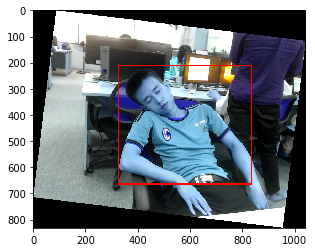

In [32]:
img = cv2.imread("/home/neosai/Documents/dataset/preprocess/Images/006/122_rotated_flip.jpg")
img = cv2.rectangle(img, (325,212), (833,664), (255, 0, 0), 3)
plt.imshow(img)

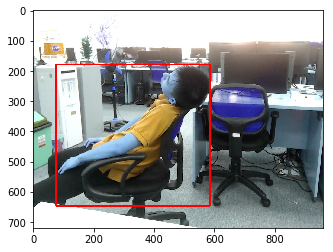

In [33]:
img = cv2.imread("/home/neosai/Documents/dataset/preprocess/Images/007/122_flip.jpg")
img = cv2.rectangle(img, (75,180), (586,646), (255, 0, 0), 3)
plt.imshow(img)

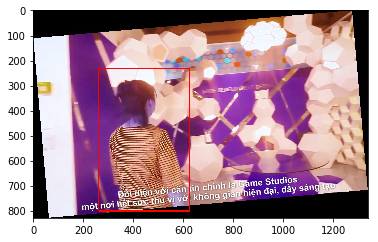

In [50]:
img = cv2.imread("/home/damvantai/Documents/github/open_source/Multi-class-BBox-Label-Tool/Images/003/748_rotated.jpg")
img = cv2.rectangle(img, (262,234), (626,801), (255, 0, 0), 3)
plt.imshow(img)

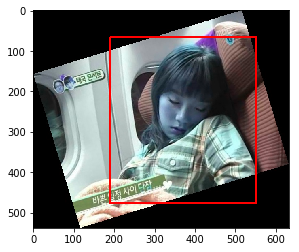

In [6]:
img = cv2.imread("/home/neosai/Documents/dataset/preprocess/Images/004/1435651045-cdaataeyeon_lbky_rotated.jpg")
img = cv2.rectangle(img, (190,67), (552,477), (255, 0, 0), 3)
plt.imshow(img)

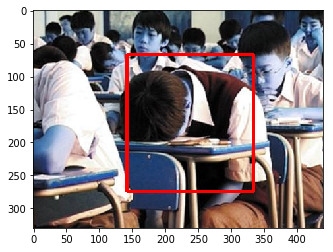

In [3]:
img = cv2.imread("/home/neosai/Documents/dataset/preprocess/Images/002/hoc-sinh-chia-ca-ngu-gat-trong-lop-0_flip.jpg")
img = cv2.rectangle(img, (142,67),(334,274), (255, 0, 0), 3)
plt.imshow(img)

In [61]:
img.shape

(1045, 1429, 3)

In [63]:
height, width = img.shape[0:2]

In [64]:
width

1429

In [65]:
height

1045